# Algorithms&Complexity - In Class Assignments (Week 7)
**Manuela Cleves**

**1. Implement a Markov chain working with whole words instead of letters.**
Leave the number of words in a sequence as an adjustable parameter, but due to memory limitations keep it at two.
Example: k=2 “word1 word2” as one of the possible sequences.
To test your implementation, you can use a smaller text.
If you want, you can try to use something larger as an input text (a small book).
Hint: Use a sparse dictionary from scipy.sparse.dok_matrix

Tips from Ilia
def create_markov_chain(states, transition_matrix):
    """
    Create a Markov chain.

    Parameters:
    - states: List of states in the Markov chain.
    - transition_matrix: Dictionary representing transition probabilities.

    Returns:
    - A function that simulates the Markov chain.
    """
    

In [1]:
import random
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mclevesluna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from collections import defaultdict
from nltk.tokenize import word_tokenize
import random

def preprocess_text(text):

    #Preprocess the text by tokenizing and converting to lowercase
    tokens = word_tokenize(text.lower())
    return tokens

def create_markov_chain(states, text):

    transition_matrix = defaultdict(dict)

    for i in range(len(text) - 1):
        current_state = text[i]
        next_state = text[i + 1]

        if next_state not in transition_matrix[current_state]:
            transition_matrix[current_state][next_state] = 1
        else:
            transition_matrix[current_state][next_state] += 1

    # Normalize transition probabilities
    for state in transition_matrix:
        total_transitions = sum(transition_matrix[state].values())
        for next_state in transition_matrix[state]:
            transition_matrix[state][next_state] /= total_transitions

    return lambda num_words, seed_word: simulate_chain(num_words, seed_word, transition_matrix)

#Simulate the Markov chain and generate a sequence of words.
def simulate_chain(num_words, seed_word, transition_matrix):

    current_word = seed_word
    generated_sequence = [current_word]

    for _ in range(num_words - 1):
        if current_word in transition_matrix:
            next_word = random.choices(
                list(transition_matrix[current_word].keys()),
                weights=list(transition_matrix[current_word].values())
            )[0]
            generated_sequence.append(next_word)
            current_word = next_word
        else:
            break

    return generated_sequence

# Audre Lorde's poem
poem = """
Moon marked and touched by sun   
my magic is unwritten
but when the sea turns back
it will leave my shape behind.   
I seek no favor
untouched by blood
unrelenting as the curse of love   
permanent as my errors
or my pride
I do not mix
love with pity
nor hate with scorn
and if you would know me
look into the entrails of Uranus   
where the restless oceans pound.

I do not dwell
within my birth nor my divinities   
who am ageless and half-grown   
and still seeking
my sisters
witches in Dahomey
wear me inside their coiled cloths   
as our mother did
mourning.

I have been woman
for a long time
beware my smile
I am treacherous with old magic   
and the noon's new fury
with all your wide futures   
promised
I am
woman
and not white.
"""

# Preprocess the text
preprocessed_text = preprocess_text(poem)

# Create the list of states
states = list(set(preprocessed_text))

# Create the Markov chain function
markov_chain = create_markov_chain(states, preprocessed_text)

# Simulate the Markov chain with a seed word and generate a sequence of words
generated_sequence = markov_chain(num_words=20, seed_word='woman')
print(generated_sequence)


['woman', 'for', 'a', 'long', 'time', 'beware', 'my', 'divinities', 'who', 'am', 'woman', 'for', 'a', 'long', 'time', 'beware', 'my', 'magic', 'and', 'if']


**Other code used in class (NOT for grading)**

**Regression demonstration**

In [1]:
#import libraries

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#import data

file_name = 'Documents/Algoritms&Complexity/Week 7/Housing.csv'
df = pd.read_csv(file_name, encoding='utf-8')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


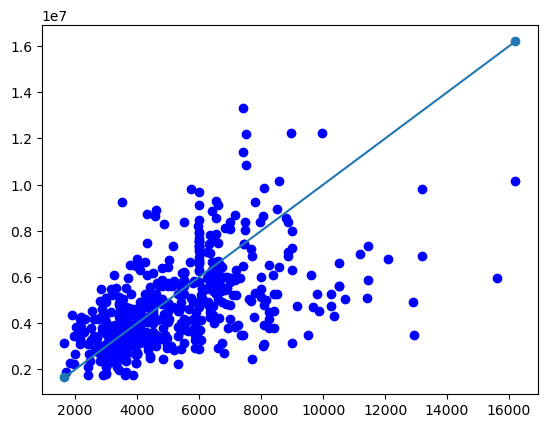

In [3]:
# Plot the scatter plot in 2D

area = df['area'].to_numpy() #/ 1000
price = df['price'].to_numpy() #/ 1e6
def line(b1, b2, x):
    y = b1 + b2*x
    return y
fig, ax = plt.subplots()
ax.scatter(area, price, c ="blue")
x = np.array([min(area), max(area)])
y = line(0, 1000, x)
plt.plot([x[0], x[-1]], [y[0], y[-1]], marker = 'o')
plt.show()

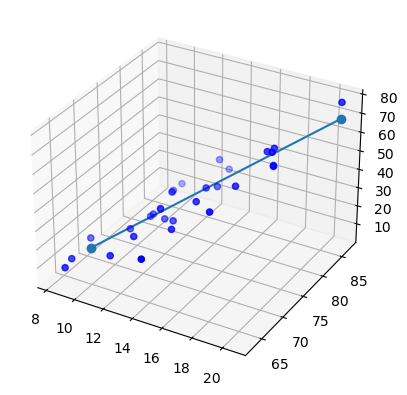

In [4]:
# Plot the scatter plot in 3D

df = sm.datasets.get_rdataset('trees').data
df.head()
girth = df['Girth'].to_numpy()
height = df['Height'].to_numpy()
volume = df['Volume'].to_numpy()
X = np.stack([np.ones(31), girth, height], axis=1)
B = np.linalg.inv(np.dot(X.T,X))
B = np.dot(B,X.T)
B = np.dot(B,volume)
def line_3d(b, x):
    y = np.dot(x, b)
    return y
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(girth, height, volume, c ="blue")
y = line_3d(B, X)
plt.plot([girth[0], girth[-1]], [height[0], height[-1]], [y[0], y[-1]], marker = 'o')
plt.show()

**1. Molusc task**

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1)  #id=186
abalone = abalone.data.features 


In [9]:
#Show data
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [29]:
#Implement multivariate linear regression, find coefficient that will allow me to input an x to give me its y
#𝑌 = 𝑋𝐵 + 𝐸

#Define features and target
X=abalone[['Length','Diameter','Height']].to_numpy()
Y=abalone[['Whole_weight','Shucked_weight']].to_numpy()
#Find coefficient matrix (B)
#Using formular from ppt


In [30]:
X.shape

(4177, 3)

In [31]:
#TransposeX
XT = np.transpose(X)  # or matrix.T
print(XT.shape)

(3, 4177)


In [27]:
XT.shape

(3, 4177)

In [33]:
#Multiply XT by X

result_matrix = np.dot(XT, X)
result_matrix.shape

(3, 3)

In [34]:
# Find the inverse of the matrix you calculated in the last step

inverse_XTX = np.linalg.inv(result_matrix)

In [38]:
result_matrix1 = np.dot(inverse_XTX, XT)

In [39]:
# Multiply XT by Y

coefficients = np.dot(result_matrix1, Y)
coefficients.shape

(3, 2)

In [20]:
# Multiply the inverse matrix you found by the result_matrix1
# QUESTION FOR ILIA, BECAUSE THE MATRIX SIZE, THEY CAN'T NE MULTIPLIED!!!!!

coefficients= np.dot(result_matrix1,inverse_XTX)

ValueError: shapes (3,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

In [41]:
#Ask help for plotting

print(coefficientes)

NameError: name 'coefficientes' is not defined

**2. Markov Chain Task**

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mclevesluna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

['woman', 'for', 'a', 'long', 'time', 'beware', 'my', 'sisters', 'witches', 'in', 'dahomey', 'wear', 'me', 'inside', 'their', 'coiled', 'cloths', 'as', 'my', 'magic']
